In [1]:
# Standard
import numpy as np
import pandas as pd
from numpy.random import randn

# Stats
from scipy import stats

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
food = pd.read_csv('../input/FoodFacts.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Sugar Example from Kaggle for Caffeine (doesn't work well - not enough info on caffeine)

In [3]:
# Modify and clean data
food.countries = food.countries.str.lower()
world_sugars = food[food.sugars_100g.notnull()]
world_caffeine = food[food.caffeine_100g.notnull()]

In [4]:
def return_sugars(country):
    return world_sugars[world_sugars.countries == country].sugars_100g.tolist()
def return_caffeine(country):
    return world_caffeine[world_caffeine.countries == country].caffeine_100g.tolist()

In [5]:
# Get list of sugars per 100g for some countries
fr_sugars = return_sugars('france') + return_sugars('en:fr')
za_sugars = return_sugars('south africa')
uk_sugars = return_sugars('united kingdom') + return_sugars('en:gb')
us_sugars = return_sugars('united states') + return_sugars('en:us') + return_sugars('us')
sp_sugars = return_sugars('spain') + return_sugars('españa') + return_sugars('en:es')
nd_sugars = return_sugars('netherlands') + return_sugars('holland')
au_sugars = return_sugars('australia') + return_sugars('en:au')
ca_sugars = return_sugars('canada') + return_sugars('en:ca')
de_sugars = return_sugars('germany')

# Get list of caffeine per 100g for some countries
fr_caffeine = return_caffeine('france') + return_caffeine('en:fr')
za_caffeine = return_caffeine('south africa')
uk_caffeine = return_caffeine('united kingdom') + return_caffeine('en:gb')
us_caffeine = return_caffeine('united states') + return_caffeine('en:us') + return_caffeine('us')
sp_caffeine = return_caffeine('spain') + return_caffeine('españa') + return_caffeine('en:es')
nd_caffeine = return_caffeine('netherlands') + return_caffeine('holland')
au_caffeine = return_caffeine('australia') + return_caffeine('en:au')
ca_caffeine = return_caffeine('canada') + return_caffeine('en:ca')
de_caffeine = return_caffeine('germany')

In [6]:
all_sugars = pd.DataFrame([fr_sugars,za_sugars,uk_sugars,us_sugars,sp_sugars,nd_sugars,au_sugars,ca_sugars,de_sugars])
all_caffeine = pd.DataFrame([fr_caffeine,za_caffeine,uk_caffeine,us_caffeine,sp_caffeine,nd_caffeine,au_caffeine,ca_caffeine,de_caffeine])

In [7]:
avg_all_sugars = pd.DataFrame.mean(all_sugars, axis=1)
avg_all_caffeine = pd.DataFrame.mean(all_caffeine, axis=1) # I stop doing caffeine research here
avg_all_sugars, avg_all_caffeine

(0    12.477796
 1     7.740000
 2    16.290629
 3    16.324474
 4     9.657916
 5    17.931739
 6    14.664474
 7    16.891364
 8    11.518462
 dtype: float64, 0     0.498510
 1          NaN
 2          NaN
 3     0.013477
 4          NaN
 5          NaN
 6     0.018000
 7          NaN
 8    20.000000
 dtype: float64)

In [8]:
countries = ['FR', 'ZA', 'UK', 'US', 'ES', 'ND', 'AU', 'CA', 'DE']

In [9]:
avg_all_sugars.index = countries
avg_all_sugars.index

Index(['FR', 'ZA', 'UK', 'US', 'ES', 'ND', 'AU', 'CA', 'DE'], dtype='object')

In [10]:
# Sort pd array
avg_all_sugars.sort_values(ascending=False)

ND    17.931739
CA    16.891364
US    16.324474
UK    16.290629
AU    14.664474
FR    12.477796
DE    11.518462
ES     9.657916
ZA     7.740000
dtype: float64

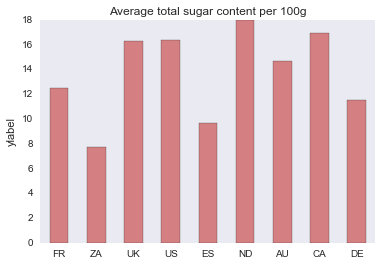

In [11]:
plot = avg_all_sugars.plot(kind='bar',title='Average total sugar content per 100g',rot=0,alpha=0.75,grid=False,color='indianred')
plot.set_ylabel('ylabel')